# Fluxes analysis


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set(style='ticks')
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (18,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_field_v2_from_20208010/processed/30min")

wm1_path = proc_dir / "eddypro_WM1_30min_full_output_2020-08-13T135809_adv.csv"
m6_path = proc_dir / "eddypro_TRS_M506_30min_full_output_2020-08-13T140908_adv.csv"
m7unf_path = proc_dir / "eddypro_TRS_M507_30min_full_output_2020-08-13T140214_adv.csv"


cache_dir = Path("data_cache")


wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir', 'Tau', 'H', 'air_temperature', 'u*']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w', 'air_temperature': 't'}

In [ ]:
wm1, m6, m7unf, mytrs = map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
#     .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename),
    [wm1_path, m6_path, m7unf_path, mytrs_path])

In [ ]:
data = pd.concat(
    map(
    lambda x: x[0].assign(anem=x[1]),
    zip([wm1, m6, m7unf, mytrs], ['wm1', 'm6', 'm7unf', 'mytrs']))
)
data.anem = pd.Categorical(data.anem)

In [ ]:
data.query('anem == "wm1"')

,u,v,w,wind_speed,wind_dir,Tau,H,t,u*,anem
date_time,,,,,,,,,,
2020-08-10 15:00:00,0.592734,-1.856710,-0.117873,1.952660,254.84700,-0.161664,164.35200,309.123,0.383649,wm1
2020-08-10 15:30:00,-0.137880,-2.195340,0.004207,2.199810,274.36000,-0.200517,236.72800,309.208,0.427329,wm1
2020-08-10 16:00:00,0.145467,-2.095640,-0.013016,2.100830,268.09400,-0.286764,245.74700,309.173,0.511003,wm1
2020-08-10 16:30:00,0.697851,-1.936100,-0.069184,2.059290,253.07900,-0.255489,215.33300,309.105,0.482281,wm1
2020-08-10 17:00:00,0.591637,-1.714100,-0.138436,1.818680,253.39700,-0.142132,145.27300,308.722,0.359494,wm1
...,...,...,...,...,...,...,...,...,...,...
2020-08-13 07:30:00,-0.105325,-0.058721,0.009327,0.120963,310.26500,0.005041,-10.42640,295.563,0.066246,wm1
2020-08-13 08:00:00,-0.454590,-0.013477,0.046994,0.457242,352.02500,-0.004903,2.74689,297.631,0.065560,wm1
2020-08-13 08:30:00,-0.851852,0.167279,0.037235,0.868980,9.82383,0.004899,3.55261,299.246,0.065712,wm1


**Rotate WM1 components** EP does not rotate them according to installation offset

In [ ]:
data.dtypes

u              float64
v              float64
w              float64
wind_speed     float64
wind_dir       float64
Tau            float64
H              float64
t              float64
u*             float64
anem          category
dtype: object

In [ ]:
data

,u,v,w,wind_speed,wind_dir,Tau,H,t,u*,anem,time_day,wind_dir_binned
date_time,,,,,,,,,,,,
2020-08-10 15:00:00,0.592734,-1.856710,-0.117873,1.952660,254.84700,-0.161664,164.3520,309.123,0.383649,wm1,15:00,"(224.635, 269.462]"
2020-08-10 15:30:00,-0.137880,-2.195340,0.004207,2.199810,274.36000,-0.200517,236.7280,309.208,0.427329,wm1,15:30,"(269.462, 314.29]"
2020-08-10 16:00:00,0.145467,-2.095640,-0.013016,2.100830,268.09400,-0.286764,245.7470,309.173,0.511003,wm1,16:00,"(224.635, 269.462]"
2020-08-10 16:30:00,0.697851,-1.936100,-0.069184,2.059290,253.07900,-0.255489,215.3330,309.105,0.482281,wm1,16:30,"(224.635, 269.462]"
2020-08-10 17:00:00,0.591637,-1.714100,-0.138436,1.818680,253.39700,-0.142132,145.2730,308.722,0.359494,wm1,17:00,"(224.635, 269.462]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-13 07:30:00,-0.073485,-0.195485,0.079466,0.223478,293.64200,0.021742,-16.5669,296.907,0.135245,mytrs,07:30,"(269.462, 314.29]"
2020-08-13 08:00:00,-0.061273,-0.341399,0.122776,0.367974,284.44000,-0.063508,-28.0143,298.315,0.231695,mytrs,08:00,"(269.462, 314.29]"
2020-08-13 08:30:00,-0.641903,0.287413,0.107620,0.711584,22.13170,0.023925,-40.6602,298.970,0.142367,mytrs,08:30,"(0.139, 45.325]"


In [ ]:
data = add_time_of_day(data)

<AxesSubplot:xlabel='time_day', ylabel='wind_speed'>

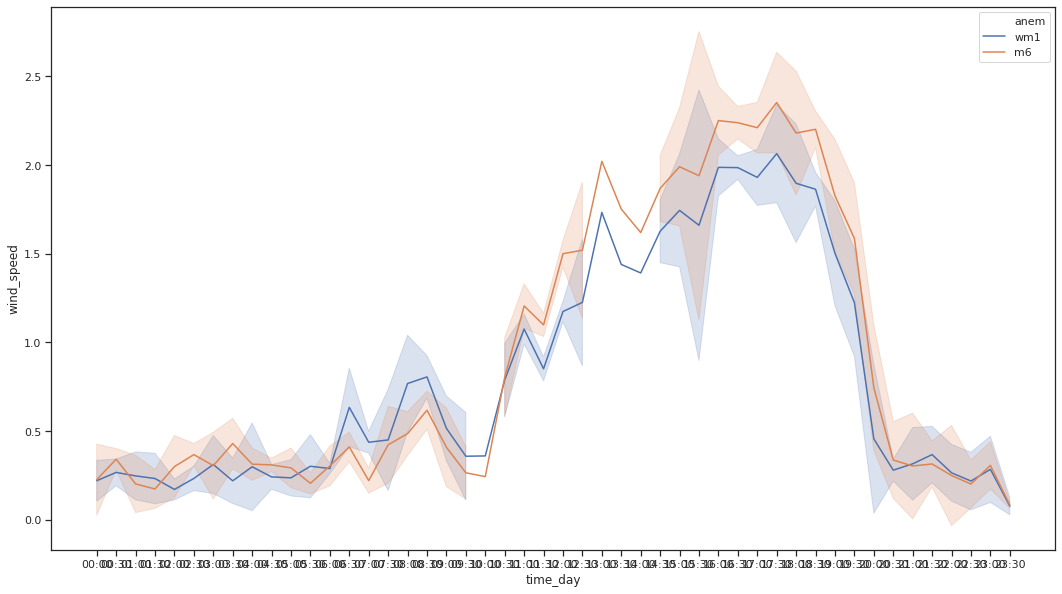

In [ ]:
sns.lineplot(x='time_day', y='wind_speed', hue='anem', ci='sd', data=data.query('anem == "wm1" or anem == "m6"'), ax=get_ax())

In [ ]:
data = add_wind_dir_binned(data, 16)

<AxesSubplot:xlabel='wind_dir_binned', ylabel='wind_speed'>

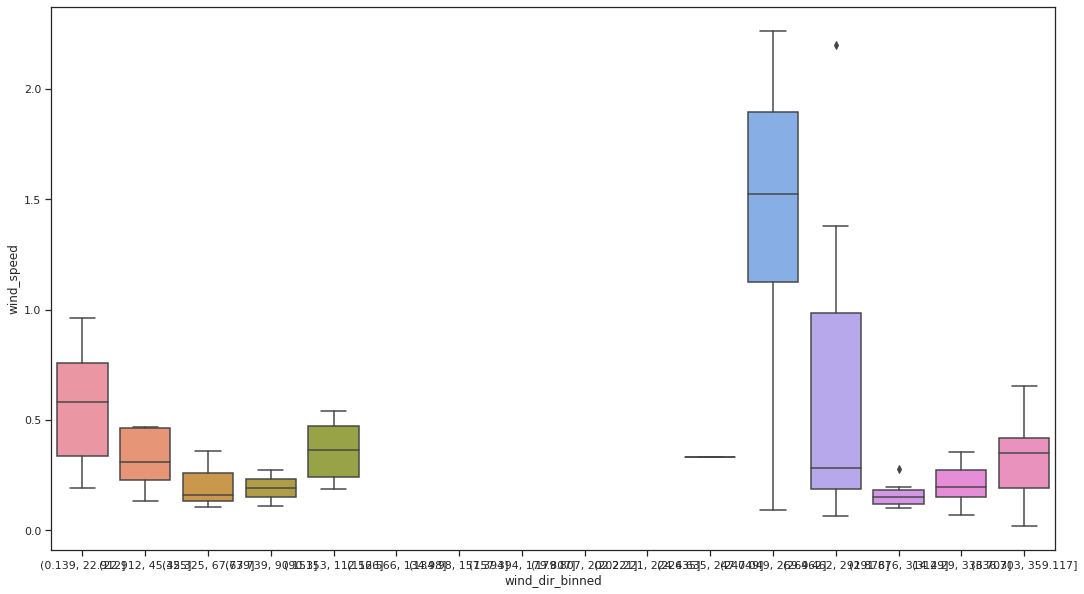

In [ ]:
sns.boxplot(x='wind_dir_binned', y='wind_speed',data=data.query('anem == "wm1"'), ax=get_ax())

In [ ]:
wind.dtypes

u              float64
v              float64
w              float64
wind_speed     float64
wind_dir       float64
Tau            float64
H              float64
t              float64
u*             float64
anemometer      object
time_day      category
dtype: object

# Fluxes

In [ ]:
plot_components([wm1, m6, m7unf], ['H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'H'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
wm1

,u,v,w,wind_speed,wind_dir,Tau,H,t
date_time,,,,,,,,
2020-08-10 15:00:00,0.592734,-1.856710,-0.117873,1.952660,254.84700,-0.161664,164.35200,309.123
2020-08-10 15:30:00,-0.137880,-2.195340,0.004207,2.199810,274.36000,-0.200517,236.72800,309.208
2020-08-10 16:00:00,0.145467,-2.095640,-0.013016,2.100830,268.09400,-0.286764,245.74700,309.173
2020-08-10 16:30:00,0.697851,-1.936100,-0.069184,2.059290,253.07900,-0.255489,215.33300,309.105
2020-08-10 17:00:00,0.591637,-1.714100,-0.138436,1.818680,253.39700,-0.142132,145.27300,308.722
...,...,...,...,...,...,...,...,...
2020-08-13 07:30:00,-0.105325,-0.058721,0.009327,0.120963,310.26500,0.005041,-10.42640,295.563
2020-08-13 08:00:00,-0.454590,-0.013477,0.046994,0.457242,352.02500,-0.004903,2.74689,297.631
2020-08-13 08:30:00,-0.851852,0.167279,0.037235,0.868980,9.82383,0.004899,3.55261,299.246


In [ ]:
wm1.loc[m7unf.index]

,u,v,w,wind_speed,wind_dir,Tau,H,t
date_time,,,,,,,,
2020-08-10 15:00:00,0.592734,-1.856710,-0.117873,1.952660,254.84700,-0.161664,164.35200,309.123
2020-08-10 15:30:00,-0.137880,-2.195340,0.004207,2.199810,274.36000,-0.200517,236.72800,309.208
2020-08-10 16:00:00,0.145467,-2.095640,-0.013016,2.100830,268.09400,-0.286764,245.74700,309.173
2020-08-10 16:30:00,0.697851,-1.936100,-0.069184,2.059290,253.07900,-0.255489,215.33300,309.105
2020-08-10 17:00:00,0.591637,-1.714100,-0.138436,1.818680,253.39700,-0.142132,145.27300,308.722
...,...,...,...,...,...,...,...,...
2020-08-13 07:30:00,-0.105325,-0.058721,0.009327,0.120963,310.26500,0.005041,-10.42640,295.563
2020-08-13 08:00:00,-0.454590,-0.013477,0.046994,0.457242,352.02500,-0.004903,2.74689,297.631
2020-08-13 08:30:00,-0.851852,0.167279,0.037235,0.868980,9.82383,0.004899,3.55261,299.246


In [ ]:
m7unf

,u,v,w,wind_speed,wind_dir,Tau,H,t
date_time,,,,,,,,
2020-08-10 15:00:00,0.682959,-1.439430,-0.023794,1.593420,240.8250,-0.184758,139.12000,303.810
2020-08-10 15:30:00,0.664223,-1.503900,-0.006563,1.644160,241.8810,-0.137658,227.47300,303.580
2020-08-10 16:00:00,0.709294,-1.465060,-0.004215,1.627800,239.9280,-0.234330,292.94500,303.491
2020-08-10 16:30:00,0.740483,-1.518140,0.060155,1.690270,239.6510,-0.220881,209.81100,303.535
2020-08-10 17:00:00,0.700245,-1.292050,0.031048,1.469980,235.8260,-0.060407,137.13900,303.377
...,...,...,...,...,...,...,...,...
2020-08-13 07:30:00,0.034670,-0.014166,0.079466,0.087852,211.9930,-0.033687,-54.03920,296.907
2020-08-13 08:00:00,0.066062,0.014123,0.122776,0.140132,175.6530,0.023724,-18.50710,298.315
2020-08-13 08:30:00,-0.008698,0.287280,0.107620,0.306924,95.4134,-0.059135,-27.20960,298.970


In [ ]:
plot_components_scatter([wm1.loc[m7unf.index],m7unf], ['H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
wm1.H.sum()

7124.168926

In [ ]:
plot_components([wm1, m6, m7unf],  ['Tau'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'Tau'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components([wm1, m7unf],  ['Tau'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'Tau'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components([wm1, m6],  ['Tau'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'Tau'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
smw.

In [ ]:
plot_components_scatter([wm1.interpolate(), m6.interpolate()],  ['Tau'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plot_components([wm1, m6, m7unf],  ['t'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'t'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components([wm1, m6, m7unf],  ['t', 'wind_speed'], vertical=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'t'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'wind_speed'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components([wm1, m6],  ['u*'], vertical=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'u*'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
side_by_side(wm1.describe(), m6.describe())

                u           v           w  wind_speed    wind_dir         Tau  \                    u           v           w  wind_speed    wind_dir         Tau  \
count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000       count  128.000000  128.000000  128.000000  128.000000  128.000000  128.000000   
mean    -0.028105   -0.520810   -0.013382    0.758874  219.924742   -0.044288       mean     0.123806   -0.692517    0.018364    0.838857  240.798774   -0.019636   
std      0.375960    0.780466    0.055690    0.669024  119.669254    0.089102       std      0.343007    0.843959    0.064485    0.790010   86.578277    0.064831   
min     -0.952375   -2.195340   -0.202719    0.021668    0.497949   -0.286763       min     -0.641903   -2.507800   -0.137405    0.041743    9.590220   -0.184643   
25%     -0.264274   -1.141692   -0.044442    0.214403   93.241200   -0.108400       25%     -0.083226   -1.360222   -0.022180    0.267350  243.151500   -0.047679   
50%     -0

In [ ]:
wm1.Tau.sum()

-5.668814026

In [ ]:
m6.Tau.sum()

-2.5134322200000008

## MyTrs (FrankeStonica)

In [ ]:
plot_components([wm1, mytrs, m6], ['Tau'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'Tau'}, xlabel='date_time'>],
      dtype=object)

# Wind data

## wind speed

array([<AxesSubplot:title={'center':'wind_speed'}, xlabel='date_time'>],
      dtype=object)

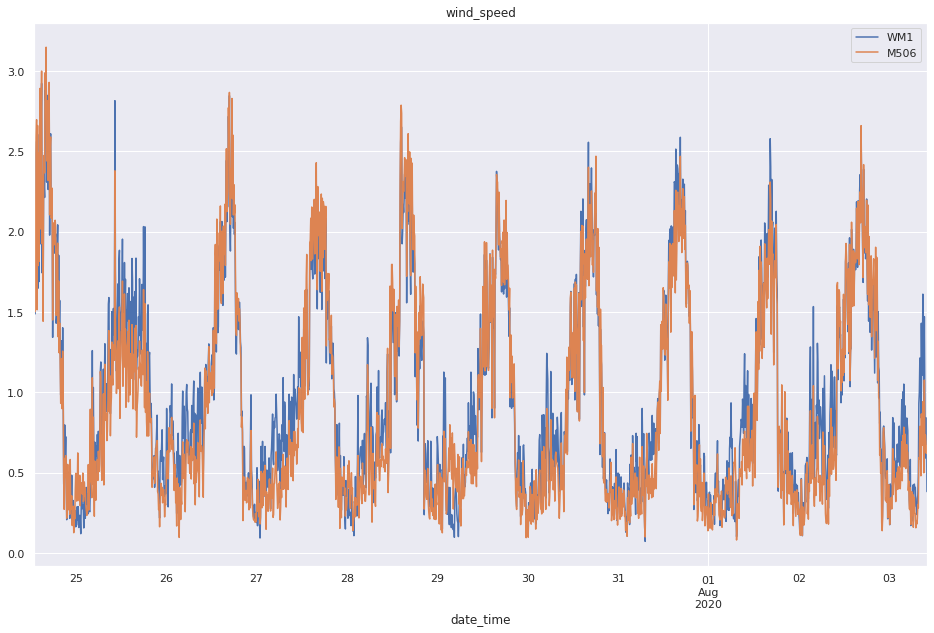

In [ ]:
plot_components(resample([wm1, m6], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

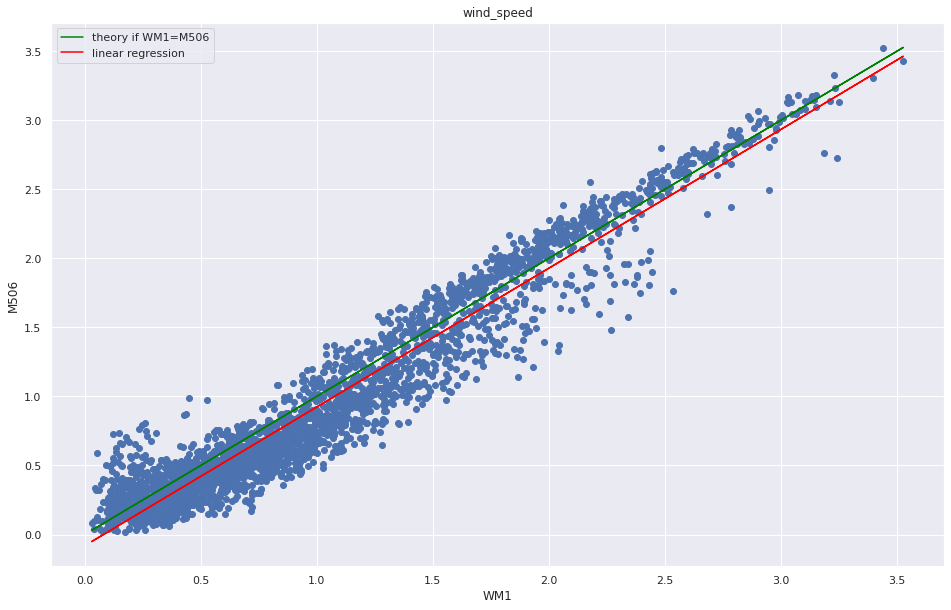

In [ ]:
plot_components_scatter([wm1, m6], ('wind_speed', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

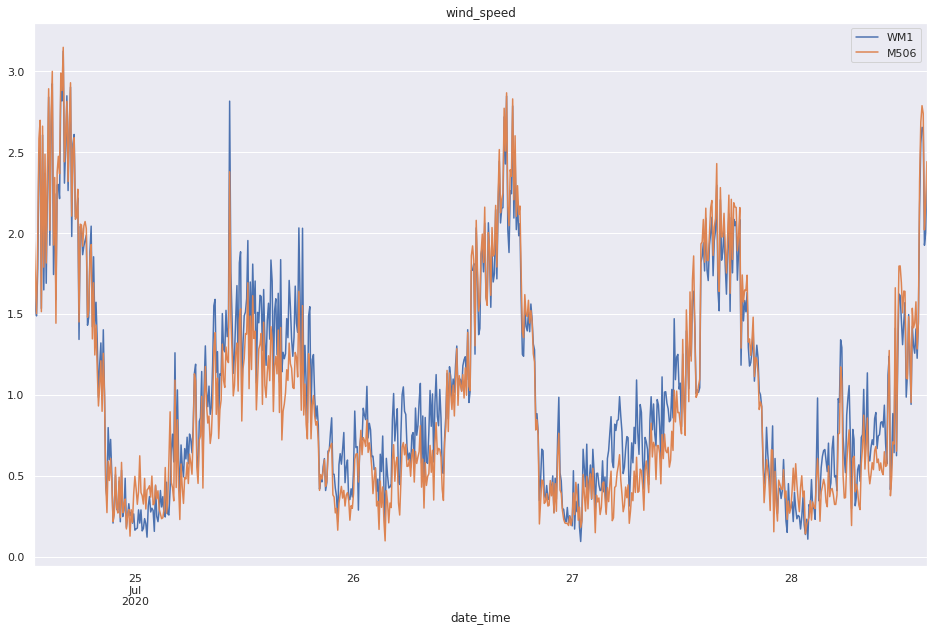

In [ ]:
plot_components(resample([wm1, m6], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## u

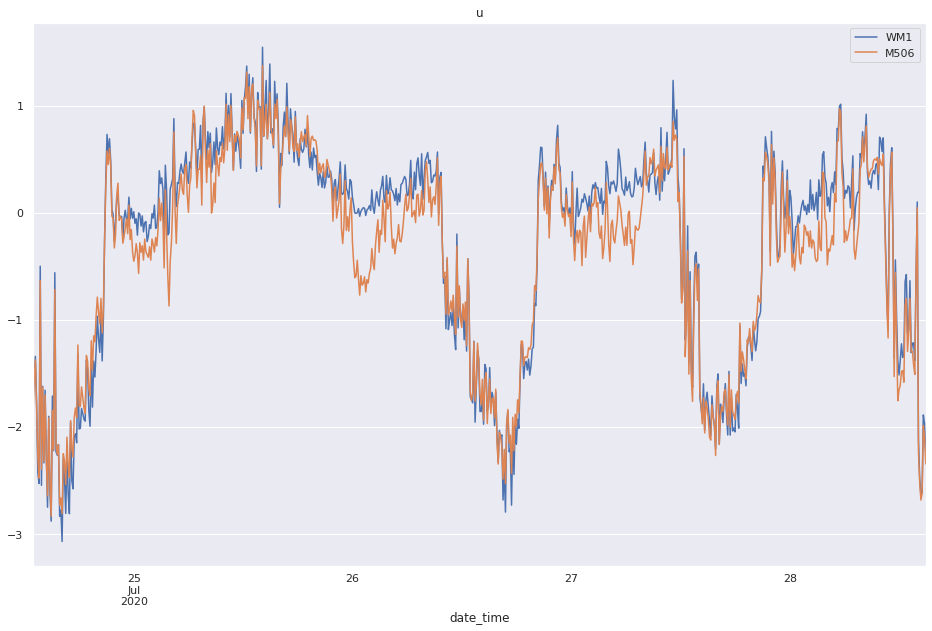

In [ ]:
plot_components(resample([wm1, m6], '8min'),('u', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

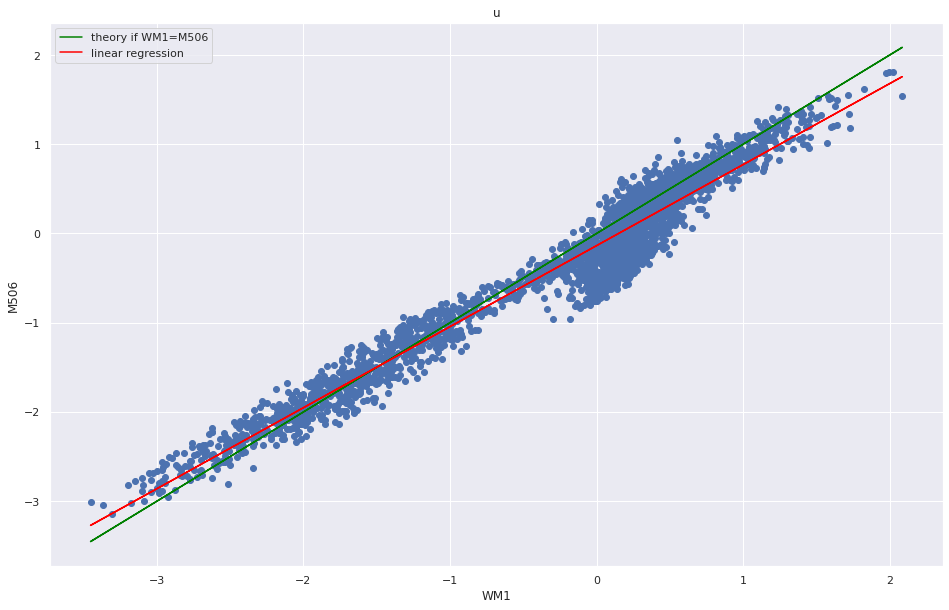

In [ ]:
plot_components_scatter([wm1, m6], ('u', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## v

Need to take into account that on the V direction is almost parallel to the mouting structure so there can be interference

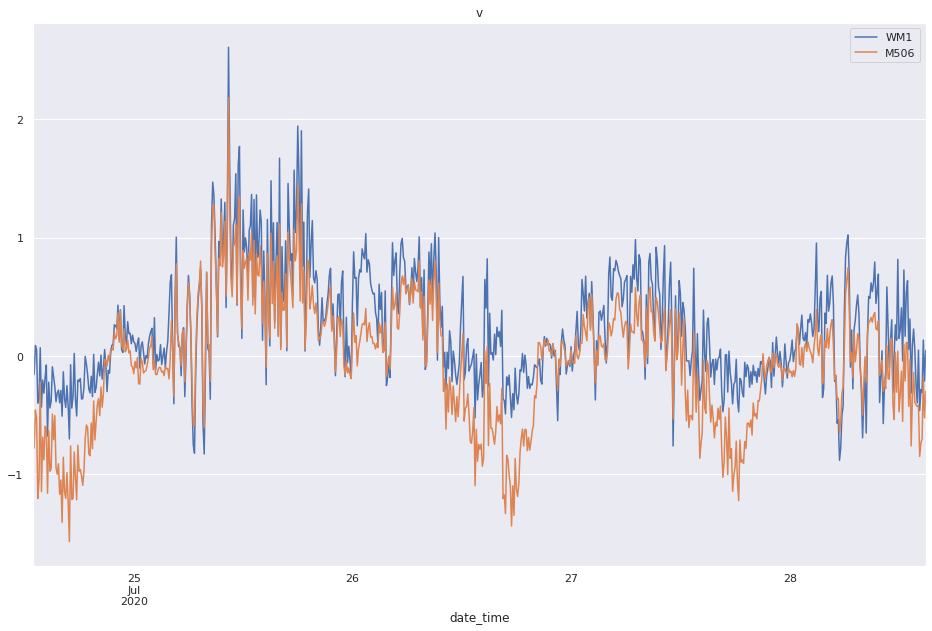

In [ ]:
plot_components(resample([wm1, m6], '8min'),('v', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

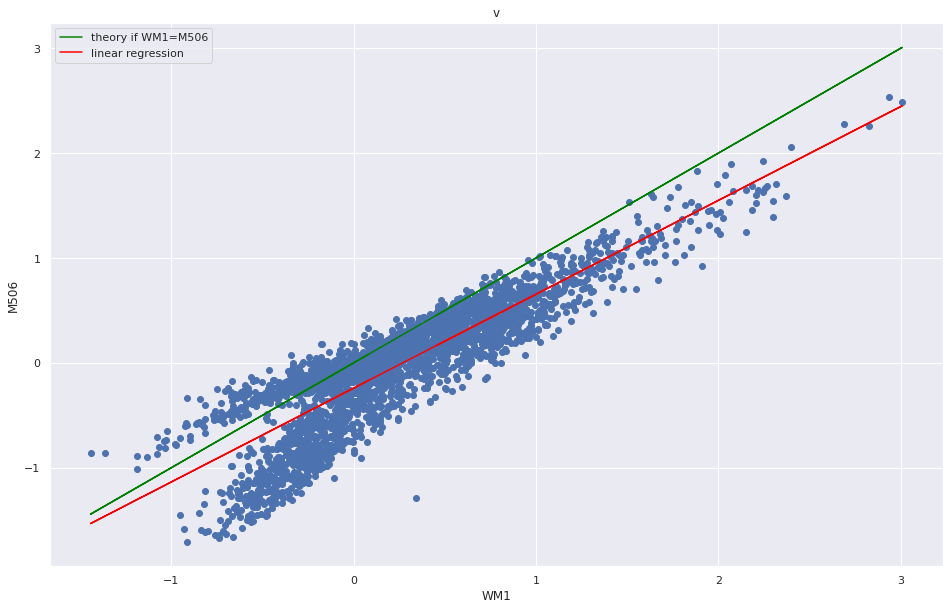

In [ ]:
plot_components_scatter([wm1, m6], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## w

can be worse but still rather bad

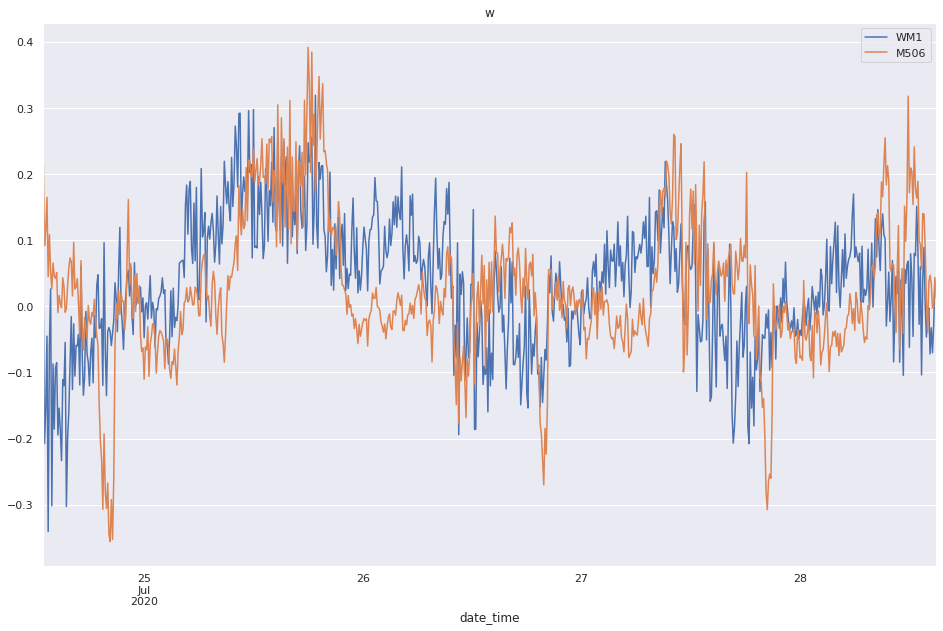

In [ ]:
plot_components(resample([wm1, m6], '8min'),('w', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

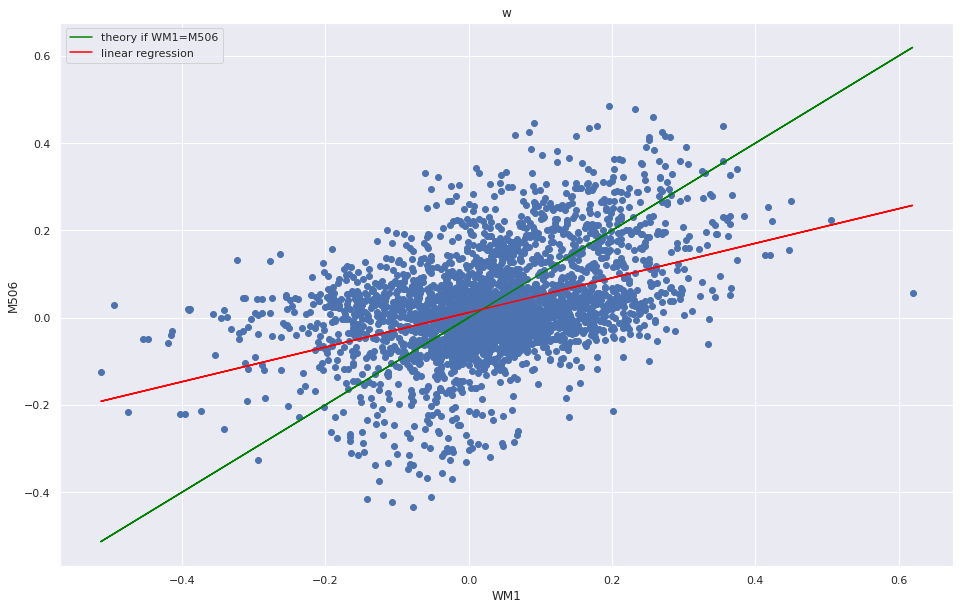

In [ ]:
plot_components_scatter([wm1, m6], ('w', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## But the Direction ...
looks bad :(

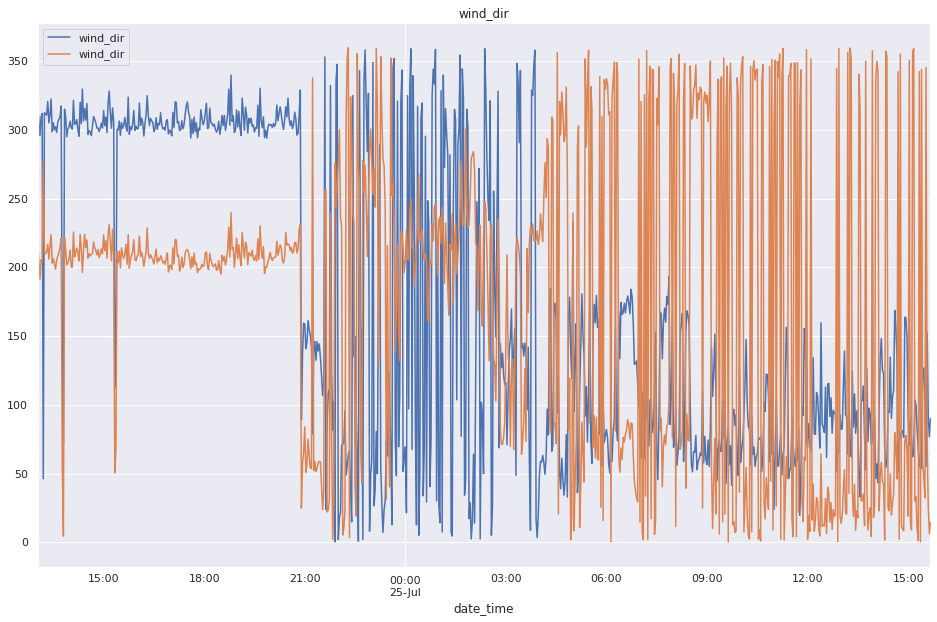

In [ ]:
plot_components([wm1[:800], m6[:800]], ('wind_dir',))

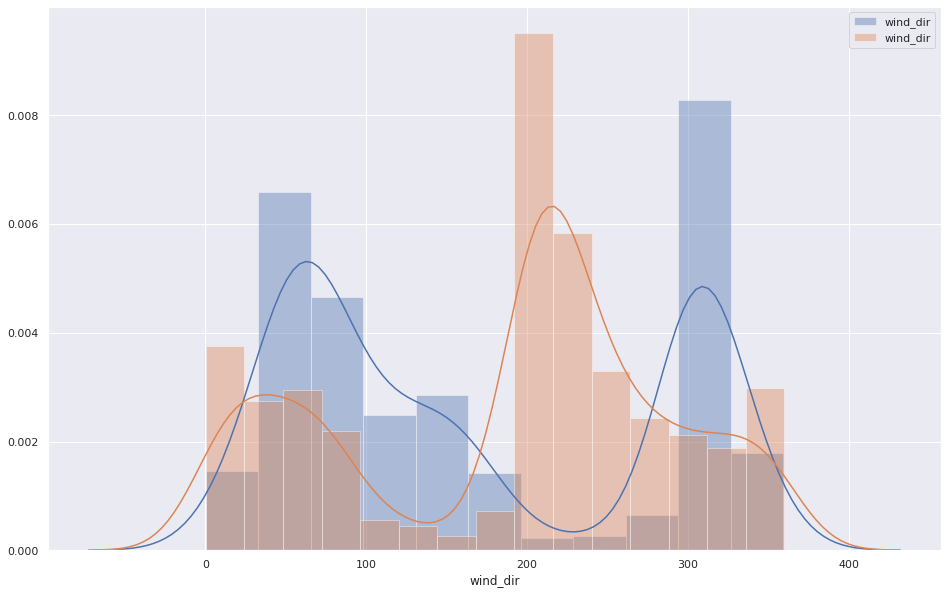

In [ ]:
plot_dist_comp([wm1, m6], ('wind_dir',))

## Just rotate by 27°

27° N is the rough average of the reading of the compass sensor on M506 (would love to know more about this sensor but there is nothing in the datasheet), while the estimated offset in the field with manual compass is 0° N, hence the idea to try to rotate by 27°.

TODO need to get a more exact number

**TODO** need to have better plots

In [ ]:
m6r = rotate_wind_ang(m6, 27)

In [ ]:
m6r = add_wind_dir(m6r) # recalc wind dir

**Warning** direction data cannot be resampled with normal mean

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

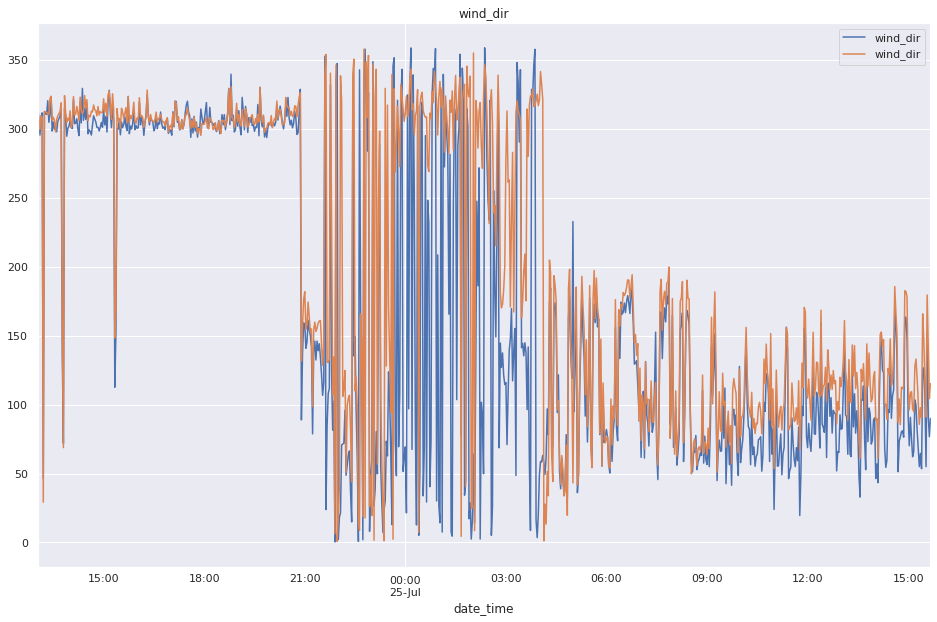

In [ ]:
plot_components([wm1[:800], m6r[:800]], ('wind_dir',))

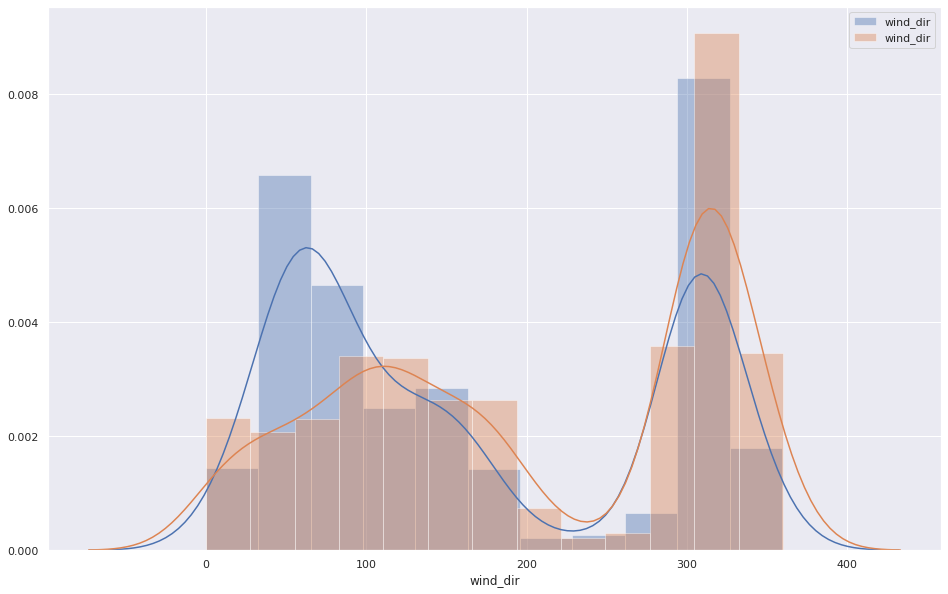

In [ ]:
plot_dist_comp([wm1, m6r], ('wind_dir',))

### Ci siamooo ma... the v is way worse now

array([<AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

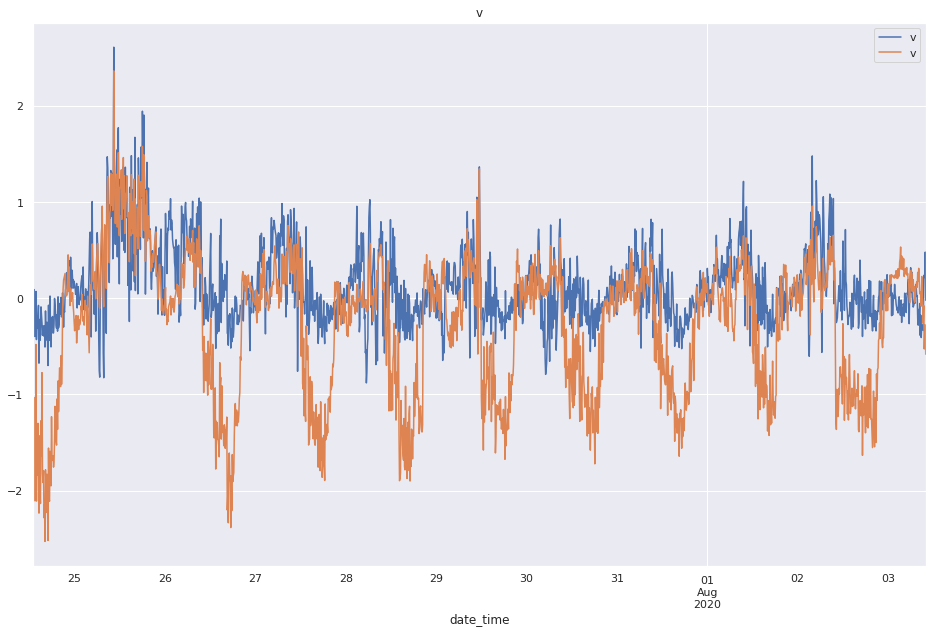

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'v')

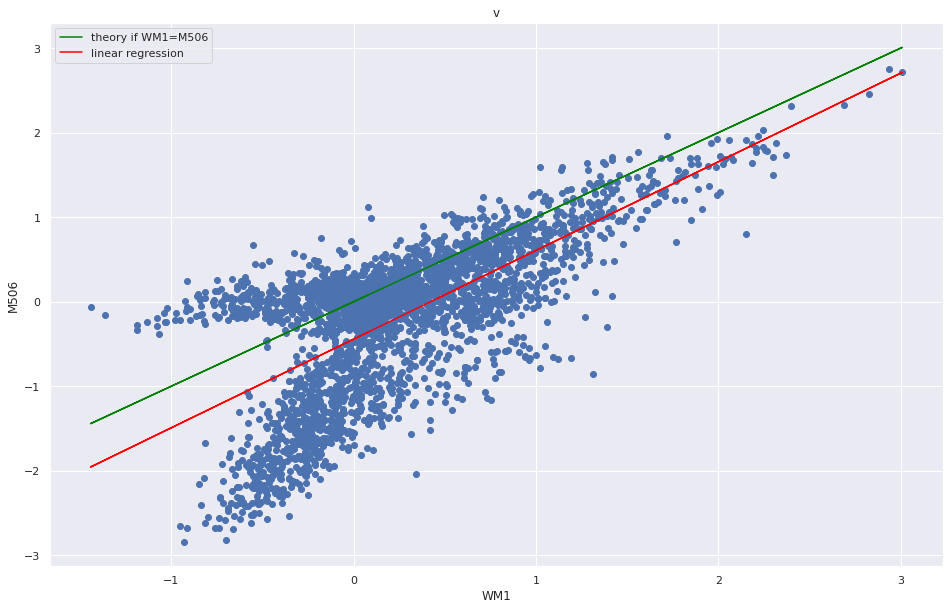

In [ ]:
plot_components_scatter([wm1, m6r], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

### u is a bit worse as well

array([<AxesSubplot:title={'center':'u'}, xlabel='date_time'>],
      dtype=object)

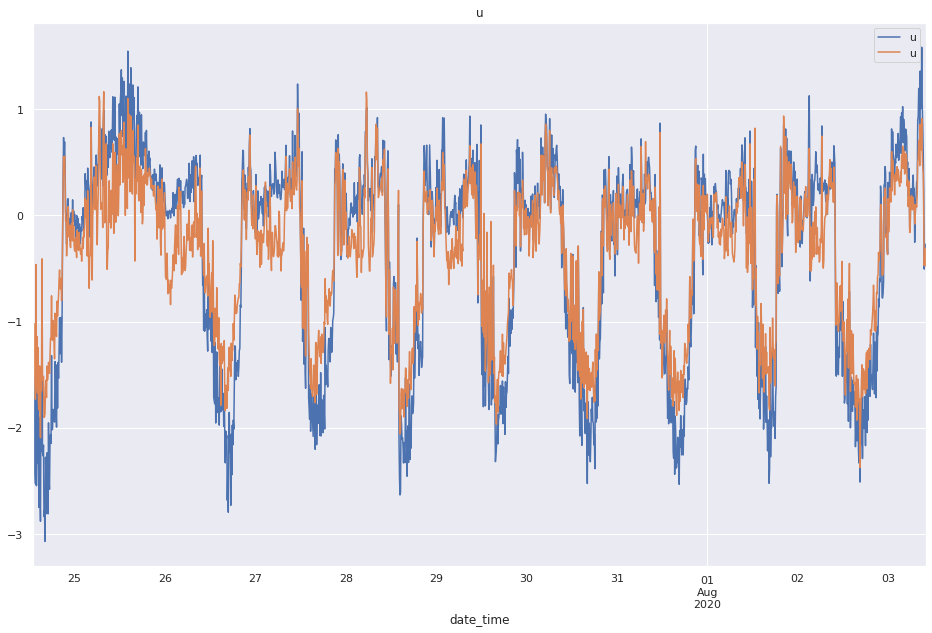

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'u')

Overall this is what is seems what needs to be done:

- Invert the u
- Invert the v
- Rotate by 27° N